# Machine Learning Project - Mobile Price Prediction

Introduction:
    
In this project, we are going to explore and analyze a dataset which contains specifications of two thousand mobile phones and 
try to predict optimum price ranges for a list of mobile phones in the market by applying various machine learning algorithms 
such as logistic regression, decision tree, random forest and k-nearest neighbors(knn).

IMPORT LIBRARY...

In [107]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

# STEP 1 : GET THE DATA

In [108]:
dataset=pd.read_csv('datasets_train.csv')

In [109]:
dataset.head(5)

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_range  
0        0             0     1            1  
1        1             1     0            2  
2        1             1     0            2  
3        1             0     0            2  
4        1             1     0            1  

[5 rows x 21 columns]

EXPLORE DATASET

In [110]:
dataset.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

Here is the attributes of our dataset:

1. id: ID
2. battery_power: Total energy a battery can store in one time measured in mAh
3. blue: Has bluetooth or not
4. clock_speed: speed at which microprocessor executes instructions
5. dual_sim: Has dual sim support or not
6. fc: Front Camera mega pixels
7. four_g: Has 4G or not
8. int_memory: Internal Memory in Gigabytes
9. m_dep: Mobile Depth in cm
10. mobile_wt: Weight of mobile phone
11. n_cores: Number of cores of processor
12. pc: Primary Camera mega pixels
13. px_height: Pixel Resolution Height
14. px_width: Pixel Resolution Width
15. ram: Random Access Memory in Megabytes
16. sc_h: Screen Height of mobile in cm
17. sc_w: Screen Width of mobile in cm
18. talk_time: longest time that a single battery charge will last when you are
19. three_g: Has 3G or not
20. touch_screen: Has touch screen or not
21. wifi: Has wifi or not
22. price_range: This is the target variable with value of 0 (low cost), 1 (medium cost), 2 (high cost) and 3 (very high cost)

In [111]:
dataset.shape

(2000, 21)

We have 2000 samples and 21 attributes.
The last attribute is a target attribute, which means that we have labeled data.


# STEP 2 : DISCOVERY AND VISUALISATION TO GET INSIGHTS 

DATA ANALYSIS...

In [112]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [113]:
dataset.describe()

battery_power       blue  clock_speed     dual_sim           fc  \
count    2000.000000  2000.0000  2000.000000  2000.000000  2000.000000   
mean     1238.518500     0.4950     1.522250     0.509500     4.309500   
std       439.418206     0.5001     0.816004     0.500035     4.341444   
min       501.000000     0.0000     0.500000     0.000000     0.000000   
25%       851.750000     0.0000     0.700000     0.000000     1.000000   
50%      1226.000000     0.0000     1.500000     1.000000     3.000000   
75%      1615.250000     1.0000     2.200000     1.000000     7.000000   
max      1998.000000     1.0000     3.000000     1.000000    19.000000   

            four_g   int_memory        m_dep    mobile_wt      n_cores  ...  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000  ...   
mean      0.521500    32.046500     0.501750   140.249000     4.520500  ...   
std       0.499662    18.145715     0.288416    35.399655     2.287837  ...   
min       0.000000     2.000000     0.100000    80.000000     1.000000  ...   
25%       0.000000    16.000000     0.200000   109.000000     3.000000  ...   
50%       1.000000    32.000000     0.500000   141.000000     4.000000  ...   
75%       1.000000    48.000000     0.800000   170.000000     7.000000  ...   
max       1.000000    64.000000     1.000000   200.000000     8.000000  ...   

         px_height     px_width          ram         sc_h         sc_w  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean    645.108000  1251.515500  2124.213000    12.306500     5.767000   
std     443.780811   432.199447  1084.732044     4.213245     4.356398   
min       0.000000   500.000000   256.000000     5.000000     0.000000   
25%     282.750000   874.750000  1207.500000     9.000000     2.000000   
50%     564.000000  1247.000000  2146.500000    12.000000     5.000000   
75%     947.250000  1633.000000  3064.500000    16.000000     9.000000   
max    1960.000000  1998.000000  3998.000000    19.000000    18.000000   

         talk_time      three_g  touch_screen         wifi  price_range  
count  2000.000000  2000.000000   2000.000000  2000.000000  2000.000000  
mean     11.011000     0.761500      0.503000     0.507000     1.500000  
std       5.463955     0.426273      0.500116     0.500076     1.118314  
min       2.000000     0.000000      0.000000     0.000000     0.000000  
25%       6.000000     1.000000      0.000000     0.000000     0.750000  
50%      11.000000     1.000000      1.000000     1.000000     1.500000  
75%      16.000000     1.000000      1.000000     1.000000     2.250000  
max      20.000000     1.000000      1.000000     1.000000     3.000000  

[8 rows x 21 columns]

DATA VISUALISATION AND ANALYSIS...

Dataset is Balanced or Not???

In [114]:
values = dataset['price_range'].value_counts().values
values

array([500, 500, 500, 500], dtype=int64)

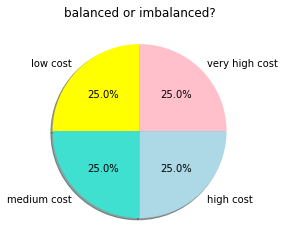

In [115]:
labels = ["low cost", "medium cost", "high cost", "very high cost"]
values = dataset['price_range'].value_counts().values
colors = ['yellow','turquoise','lightblue', 'pink']
fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.set_title('balanced or imbalanced?')
plt.show()
#dataset is balanced

In [116]:
sns.set(style='ticks')

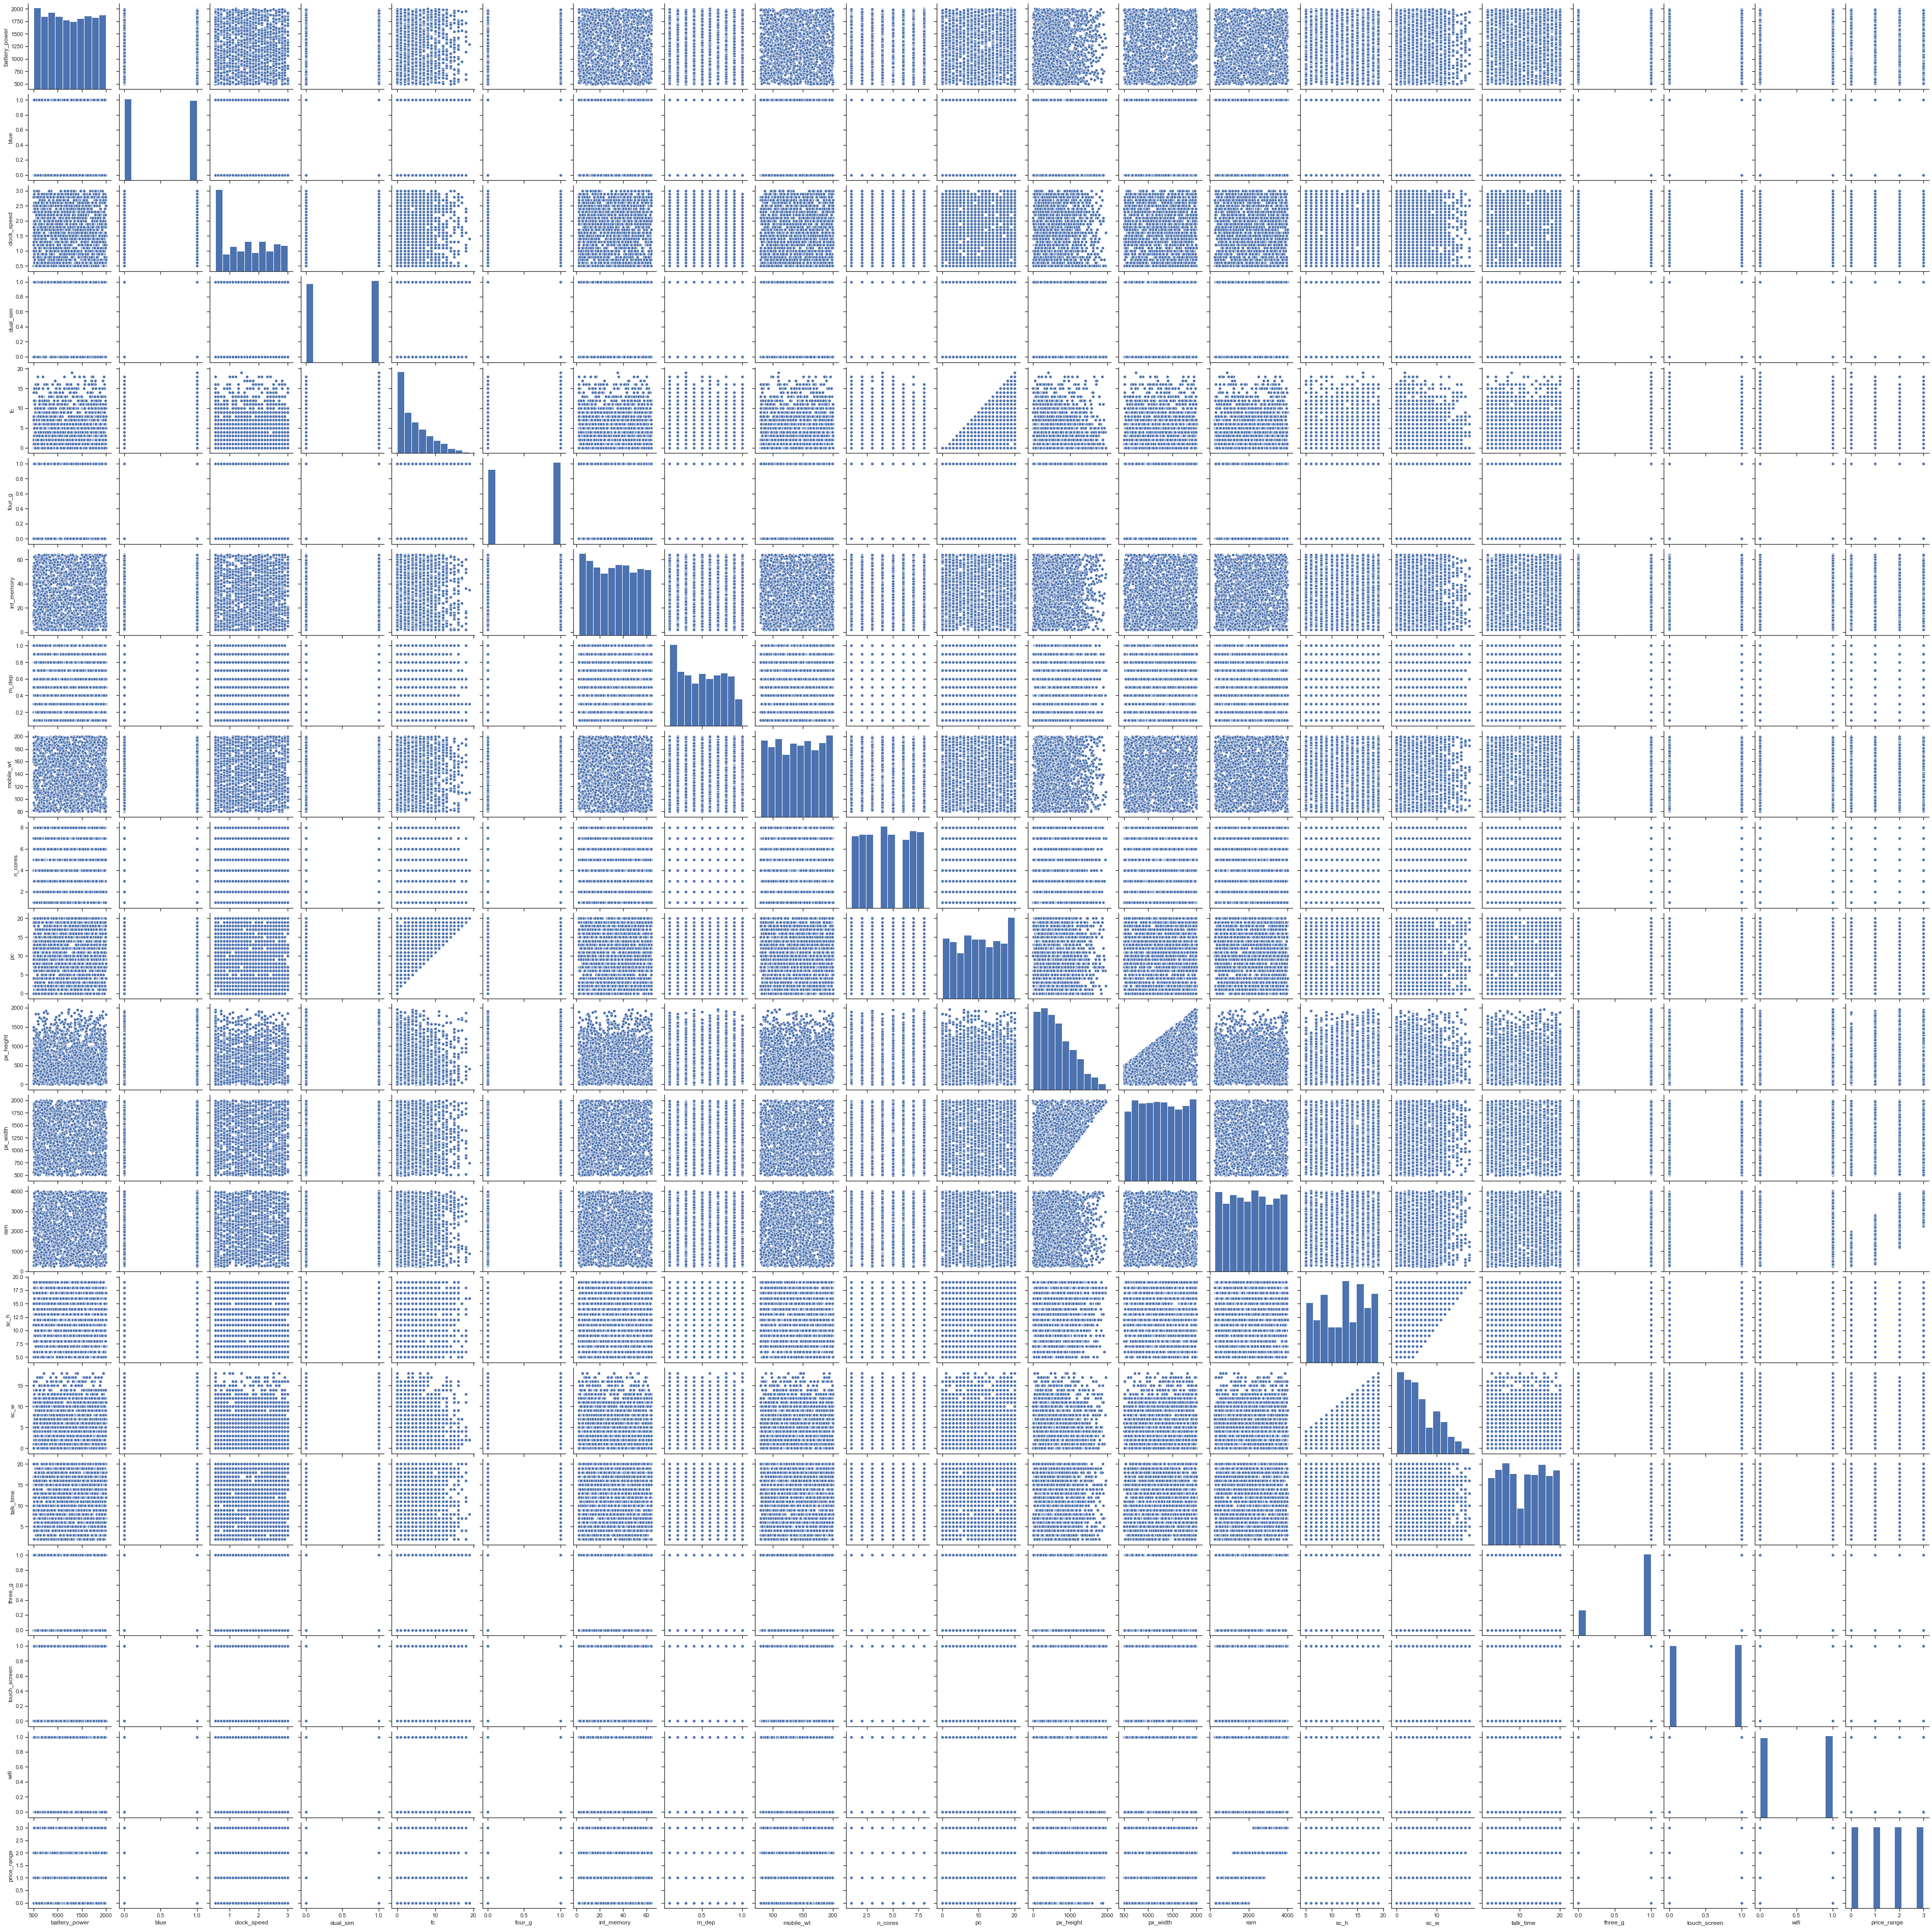

In [117]:
sns.pairplot(dataset)

In [23]:
dataset["price_range"] = dataset["price_range"].replace({0:"low cost", 1: "medium cost", 2: "high cost", 3: "very high cost"})

% of phones which support 3G

In [118]:
labels = ["3G-supported",'Not supported']
values=dataset['three_g'].value_counts().values
values

array([1523,  477], dtype=int64)

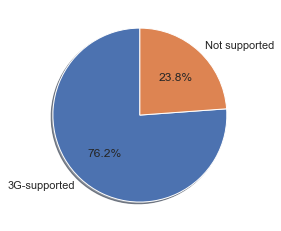

In [119]:
fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,startangle=90)
plt.show()

% of phone which support 4G:

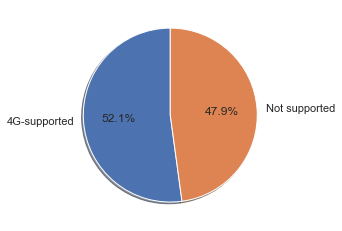

In [120]:
labels4g = ["4G-supported",'Not supported']
values4g = dataset['four_g'].value_counts().values
fig1, ax1 = plt.subplots()
ax1.pie(values4g, labels=labels4g, autopct='%1.1f%%',shadow=True,startangle=90)
plt.show()

Battery power vs price range:

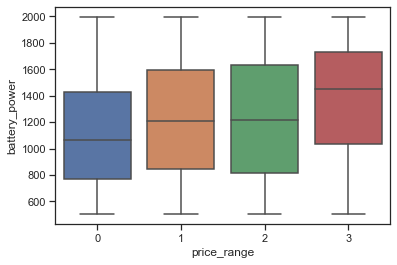

In [37]:
sns.boxplot(x="price_range", y="battery_power", data=dataset)

No of Phones vs Camera megapixels of front and primary camera

Text(0.5, 0, 'MegaPixels')

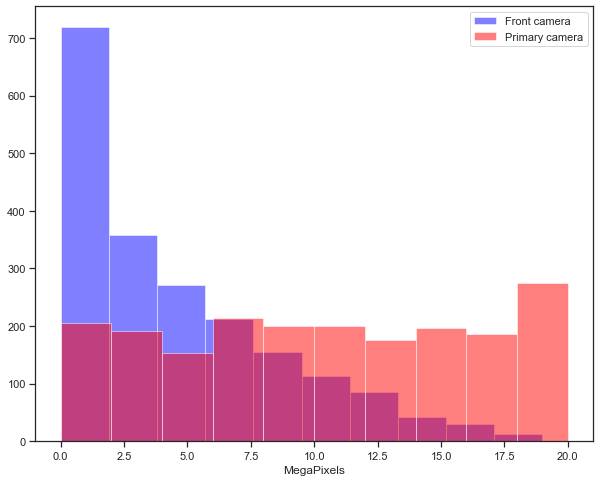

In [50]:
plt.figure(figsize=(10,8))
plt.hist(dataset['fc'],alpha=0.5,color='blue',label='Front camera')
plt.hist(dataset['pc'],alpha=0.5,color='red',label='Primary camera')
plt.legend()
plt.xlabel('MegaPixels')

% of phones have bluetooth:

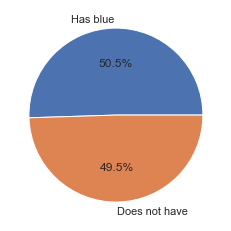

In [52]:
labels = ["Has blue",'Does not have']
values=dataset['blue'].value_counts().values
fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels,  autopct='%1.1f%%')
plt.show()

Correlation between features

In [121]:
corr=dataset.corr()
corr

battery_power      blue  clock_speed  dual_sim        fc  \
battery_power       1.000000  0.011252     0.011482 -0.041847  0.033334   
blue                0.011252  1.000000     0.021419  0.035198  0.003593   
clock_speed         0.011482  0.021419     1.000000 -0.001315 -0.000434   
dual_sim           -0.041847  0.035198    -0.001315  1.000000 -0.029123   
fc                  0.033334  0.003593    -0.000434 -0.029123  1.000000   
four_g              0.015665  0.013443    -0.043073  0.003187 -0.016560   
int_memory         -0.004004  0.041177     0.006545 -0.015679 -0.029133   
m_dep               0.034085  0.004049    -0.014364 -0.022142 -0.001791   
mobile_wt           0.001844 -0.008605     0.012350 -0.008979  0.023618   
n_cores            -0.029727  0.036161    -0.005724 -0.024658 -0.013356   
pc                  0.031441 -0.009952    -0.005245 -0.017143  0.644595   
px_height           0.014901 -0.006872    -0.014523 -0.020875 -0.009990   
px_width           -0.008402 -0.041533    -0.009476  0.014291 -0.005176   
ram                -0.000653  0.026351     0.003443  0.041072  0.015099   
sc_h               -0.029959 -0.002952    -0.029078 -0.011949 -0.011014   
sc_w               -0.021421  0.000613    -0.007378 -0.016666 -0.012373   
talk_time           0.052510  0.013934    -0.011432 -0.039404 -0.006829   
three_g             0.011522 -0.030236    -0.046433 -0.014008  0.001793   
touch_screen       -0.010516  0.010061     0.019756 -0.017117 -0.014828   
wifi               -0.008343 -0.021863    -0.024471  0.022740  0.020085   
price_range         0.200723  0.020573    -0.006606  0.017444  0.021998   

                 four_g  int_memory     m_dep  mobile_wt   n_cores  ...  \
battery_power  0.015665   -0.004004  0.034085   0.001844 -0.029727  ...   
blue           0.013443    0.041177  0.004049  -0.008605  0.036161  ...   
clock_speed   -0.043073    0.006545 -0.014364   0.012350 -0.005724  ...   
dual_sim       0.003187   -0.015679 -0.022142  -0.008979 -0.024658  ...   
fc            -0.016560   -0.029133 -0.001791   0.023618 -0.013356  ...   
four_g         1.000000    0.008690 -0.001823  -0.016537 -0.029706  ...   
int_memory     0.008690    1.000000  0.006886  -0.034214 -0.028310  ...   
m_dep         -0.001823    0.006886  1.000000   0.021756 -0.003504  ...   
mobile_wt     -0.016537   -0.034214  0.021756   1.000000 -0.018989  ...   
n_cores       -0.029706   -0.028310 -0.003504  -0.018989  1.000000  ...   
pc            -0.005598   -0.033273  0.026282   0.018844 -0.001193  ...   
px_height     -0.019236    0.010441  0.025263   0.000939 -0.006872  ...   
px_width       0.007448   -0.008335  0.023566   0.000090  0.024480  ...   
ram            0.007313    0.032813 -0.009434  -0.002581  0.004868  ...   
sc_h           0.027166    0.037771 -0.025348  -0.033855 -0.000315  ...   
sc_w           0.037005    0.011731 -0.018388  -0.020761  0.025826  ...   
talk_time     -0.046628   -0.002790  0.017003   0.006209  0.013148  ...   
three_g        0.584246   -0.009366 -0.012065   0.001551 -0.014733  ...   
touch_screen   0.016758   -0.026999 -0.002638  -0.014368  0.023774  ...   
wifi          -0.017620    0.006993 -0.028353  -0.000409 -0.009964  ...   
price_range    0.014772    0.044435  0.000853  -0.030302  0.004399  ...   

               px_height  px_width       ram      sc_h      sc_w  talk_time  \
battery_power   0.014901 -0.008402 -0.000653 -0.029959 -0.021421   0.052510   
blue           -0.006872 -0.041533  0.026351 -0.002952  0.000613   0.013934   
clock_speed    -0.014523 -0.009476  0.003443 -0.029078 -0.007378  -0.011432   
dual_sim       -0.020875  0.014291  0.041072 -0.011949 -0.016666  -0.039404   
fc             -0.009990 -0.005176  0.015099 -0.011014 -0.012373  -0.006829   
four_g         -0.019236  0.007448  0.007313  0.027166  0.037005  -0.046628   
int_memory      0.010441 -0.008335  0.032813  0.037771  0.011731  -0.002790   
m_dep           0.025263  0.023566 -0.009434 -0.025348 -0.018388   0.017003   
mo

In [122]:
corr=corr.price_range
corr  # bydefault it is in ascending order... 

battery_power    0.200723
blue             0.020573
clock_speed     -0.006606
dual_sim         0.017444
fc               0.021998
four_g           0.014772
int_memory       0.044435
m_dep            0.000853
mobile_wt       -0.030302
n_cores          0.004399
pc               0.033599
px_height        0.148858
px_width         0.165818
ram              0.917046
sc_h             0.022986
sc_w             0.038711
talk_time        0.021859
three_g          0.023611
touch_screen    -0.030411
wifi             0.018785
price_range      1.000000
Name: price_range, dtype: float64

In [123]:
corr.sort_values(ascending=False)

price_range      1.000000
ram              0.917046
battery_power    0.200723
px_width         0.165818
px_height        0.148858
int_memory       0.044435
sc_w             0.038711
pc               0.033599
three_g          0.023611
sc_h             0.022986
fc               0.021998
talk_time        0.021859
blue             0.020573
wifi             0.018785
dual_sim         0.017444
four_g           0.014772
n_cores          0.004399
m_dep            0.000853
clock_speed     -0.006606
mobile_wt       -0.030302
touch_screen    -0.030411
Name: price_range, dtype: float64

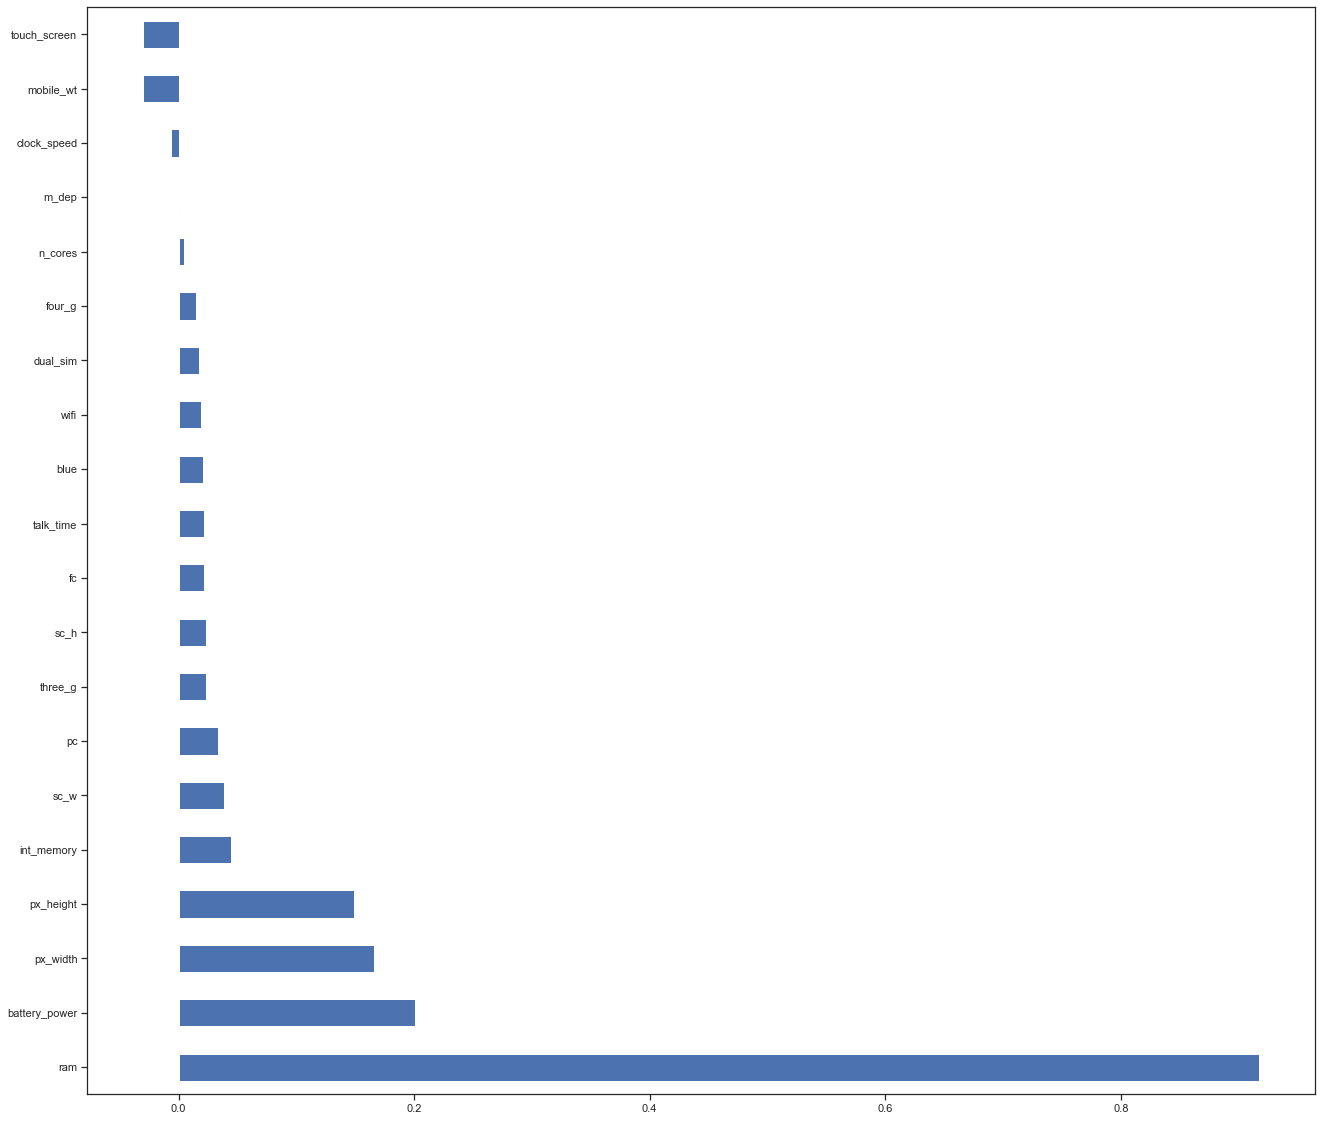

In [124]:
plt.figure(figsize=(22,20))
corr.sort_values(ascending=False)[1:].plot(kind='barh')

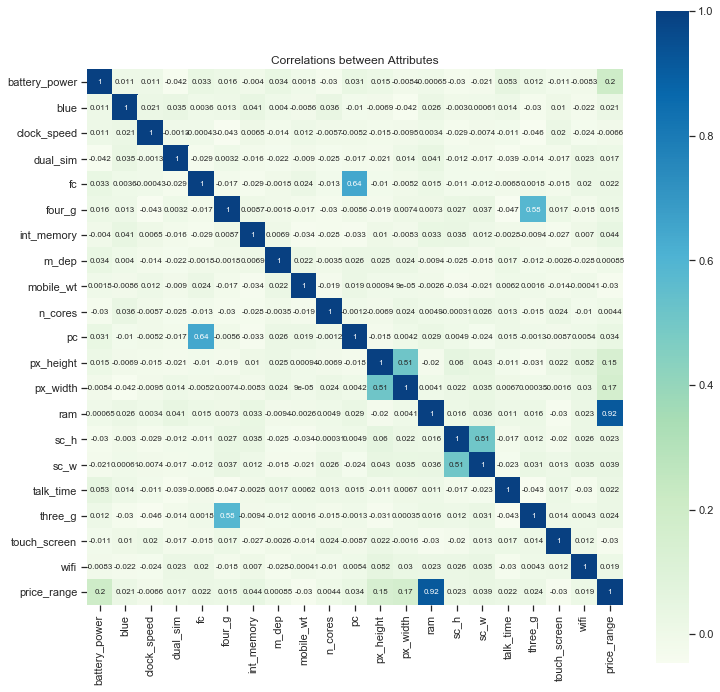

In [125]:
# Before going through machine learning applications, let's see the correlation btw features and target variable by plotting heatmap:
fig = plt.subplots (figsize = (12, 12))
sns.heatmap(dataset.corr (), square = True, cbar = True, annot = True, cmap="GnBu", annot_kws = {'size': 8})
plt.title('Correlations between Attributes')
plt.show ()

We see from the heatmap;

1. The most influential variable is ram.
2. Most of the variables have very little correlation to price range.
3. primary camera mega pixels and front Camera mega pixels have correlation (it make sense because both of them reflect technology level of resolution of the related phone model) but they do not effect prige range.
4. Having 3G and 4G is somewhat correlated
5. There is no highly correlated inputs in our dataset, so there is no multicollinearity problem.

# STEP 3 : DATA PREPROCESSING

In [126]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

Note:
1. No missing values
2. Categorical data already handled
3. No textual values

SEPERATING DATASET INTO FEATURE MATRIX AND VECTOR OF PREDICTION:

As mentioned above, our data have labels and we will apply supervised learning algorithms.
We define our target column as "y" and rest of the data which are used as inputs as "X".

In [127]:
X=dataset.iloc[:,0:20]
X.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2   2         20       756  2549     9     7         19   
1        136        3   6        905      1988  2631    17     3          7   
2        145        5   6       1263      1716  2603    11     2          9   
3        131        6   9       1216      1786  2769    16     8         11   
4        141        2  14       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  
0        0             0     1  
1        1             1     0  
2        1             1     0  
3        1             0     0  
4        1             1     0

In [128]:
y=dataset.iloc[:,20]
y.unique()
# We have four price ranges as target values and will do multi-class classification in our study.

array([1, 2, 3, 0], dtype=int64)

FEATURE SCALING : 
We need to normallize and scale the data, so we'll use MinMaxScaler

In [129]:
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()

In [130]:
X=min_max.fit_transform(X) 

In [131]:
X=pd.DataFrame(X)

In [132]:
X.head()

0    1     2    3         4    5         6         7         8  \
0  0.227789  0.0  0.68  0.0  0.052632  0.0  0.080645  0.555556  0.900000   
1  0.347361  1.0  0.00  1.0  0.000000  1.0  0.822581  0.666667  0.466667   
2  0.041416  1.0  0.00  1.0  0.105263  1.0  0.629032  0.888889  0.541667   
3  0.076152  1.0  0.80  0.0  0.000000  0.0  0.129032  0.777778  0.425000   
4  0.881764  1.0  0.28  0.0  0.684211  1.0  0.677419  0.555556  0.508333   

          9    10        11        12        13        14        15        16  \
0  0.142857  0.10  0.010204  0.170895  0.612774  0.285714  0.388889  0.944444   
1  0.285714  0.30  0.461735  0.993324  0.634687  0.857143  0.166667  0.277778   
2  0.571429  0.30  0.644388  0.811749  0.627205  0.428571  0.111111  0.388889   
3  0.714286  0.45  0.620408  0.858478  0.671566  0.785714  0.444444  0.500000   
4  0.142857  0.70  0.616327  0.475300  0.308658  0.214286  0.111111  0.722222   

    17   18   19  
0  0.0  0.0  1.0  
1  1.0  1.0  0.0  
2  1.0  1.0  0.0  
3  1.0  0.0  0.0  
4  1.0  1.0  0.0

In addition to 'data.csv' file, we have a 'test_data.csv' file, but latter one does not have target data so we do not have the chance of testing our model with it.
We split our dataset into 'training' and 'testing' datasets. And, we are going to see our models' accuracy by applying them on  test dataset.

Splitting dataset into train and test dataset in the ratio 4:1

In [133]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [134]:
# check whether the split works correctly 
print(X_train.shape)
print(X_test.shape)

(1600, 20)
(400, 20)


Now, our data is ready to be used as a sample for predicting models.

# STEP 4 : IMPLEMENTING ML ALGORITHMS

To predict the mobile phone prices, we are going to apply below algorithms respectively on the training and testing dataset.
After that, we are going to choose the best model for our data set and create target values for test dataset.

# K-Nearest Neighbour

In [135]:
from sklearn.neighbors import KNeighborsClassifier
#-------------finding the appropriate value of k---------------

score=[]
for i in range(1,21):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    score.append(knn.score(X_test,y_test))
print(max(score))
print(score.index(max(score)))

0.4325
8


In [136]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=8) #at k=8,the value is high i.e 0.4325
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')

In [137]:
y_pred_knn = knn.predict(X_test)

In [138]:
from sklearn import metrics
acc_knn = metrics.accuracy_score(y_test, y_pred_knn)
print("Accuracy : ",acc_knn)

Accuracy :  0.41


In [139]:
from sklearn.metrics import confusion_matrix
confusion_matrix_knn=confusion_matrix(y_test,y_pred_knn)
confusion_matrix_knn

array([[55, 26,  9,  4],
       [44, 35, 19,  4],
       [18, 42, 34, 26],
       [ 3, 17, 24, 40]], dtype=int64)

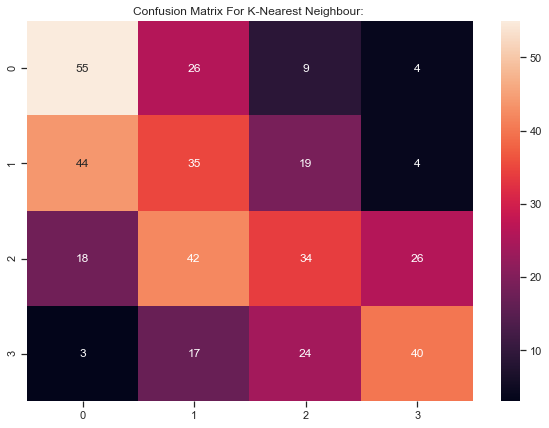

In [140]:
# Representing graphically
plt.figure(figsize = (10,7))
plt.title('Confusion Matrix For K-Nearest Neighbour: ')
sns.heatmap(confusion_matrix_knn, annot= True)

In [141]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_pred_knn, target_names=['Class 1', 'Class 2', 'Class 3','Class 4']))


Classification Report

              precision    recall  f1-score   support

     Class 1       0.46      0.59      0.51        94
     Class 2       0.29      0.34      0.32       102
     Class 3       0.40      0.28      0.33       120
     Class 4       0.54      0.48      0.51        84

    accuracy                           0.41       400
   macro avg       0.42      0.42      0.42       400
weighted avg       0.41      0.41      0.41       400



# Logistic Regression
Target variables of the data set are discrete, hence, we are going to apply multiclass logistic regression model.

In [142]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(multi_class = 'multinomial', solver = 'sag')
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

In [143]:
y_pred_lr = lr.predict(X_test)

In [144]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_lr)
confusion_matrix

array([[90,  4,  0,  0],
       [ 4, 94,  4,  0],
       [ 0, 13, 97, 10],
       [ 0,  0,  1, 83]], dtype=int64)

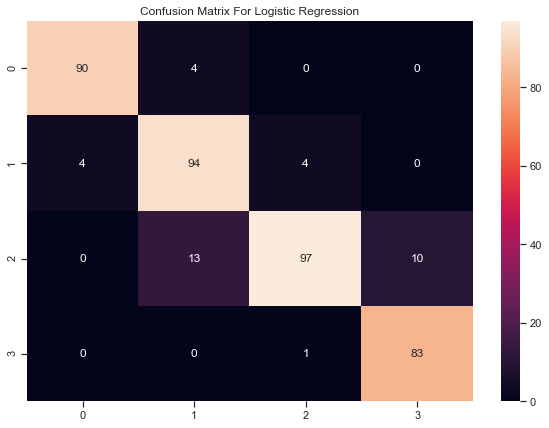

In [145]:
# Representing graphically
plt.figure(figsize = (10,7))
plt.title('Confusion Matrix For Logistic Regression')
sns.heatmap(confusion_matrix,annot=True)

In [146]:
print("Train result:", lr.score(X_train, y_train))
# accuracy of this model:
acc_lr=metrics.accuracy_score(y_test, y_pred_lr)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_lr))

Train result: 0.9525
Accuracy: 0.91


In [147]:
print(metrics.classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        94
           1       0.85      0.92      0.88       102
           2       0.95      0.81      0.87       120
           3       0.89      0.99      0.94        84

    accuracy                           0.91       400
   macro avg       0.91      0.92      0.91       400
weighted avg       0.91      0.91      0.91       400



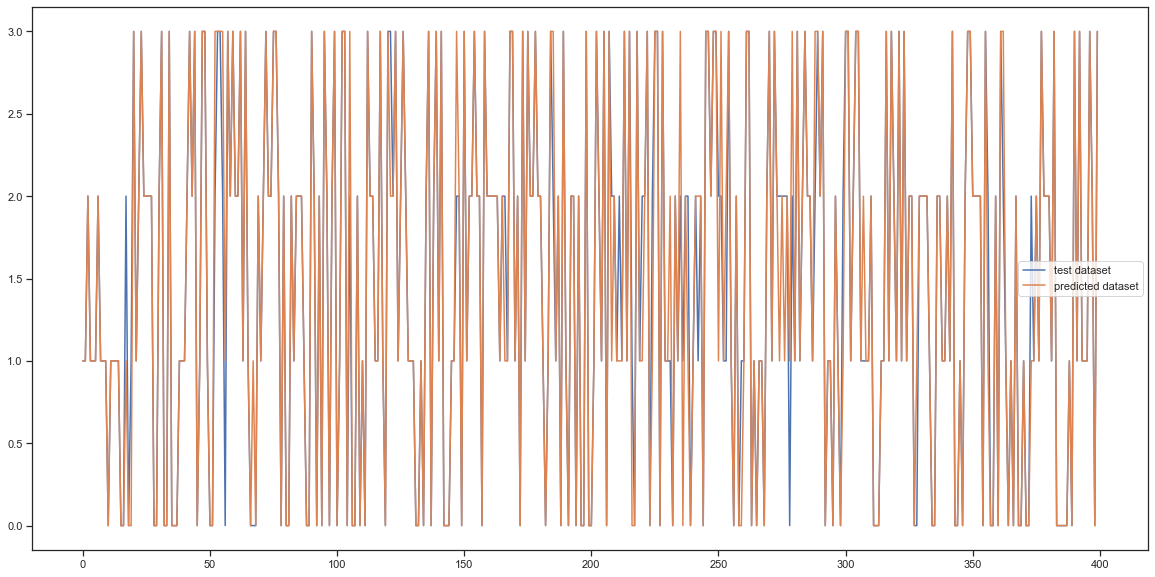

In [148]:
#diff_logistic_regression= y_test- y_pred_lr

plt.figure(figsize=(20,10))
# plt.scatter(np.arange(len(diff)),diff, label='residuals')
plt.plot(np.arange(len(X_test)), y_test, label='test dataset')
plt.plot(np.arange(len(X_test)), y_pred_lr, label='predicted dataset')
plt.legend()

# Naive Bayes

In [149]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [150]:
y_pred = classifier.predict(X_test)

In [152]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[81 13  0  0]
 [ 9 74 19  0]
 [ 0 20 89 11]
 [ 0  0  9 75]]


0.7975

Text(66.5, 0.5, 'Truth')

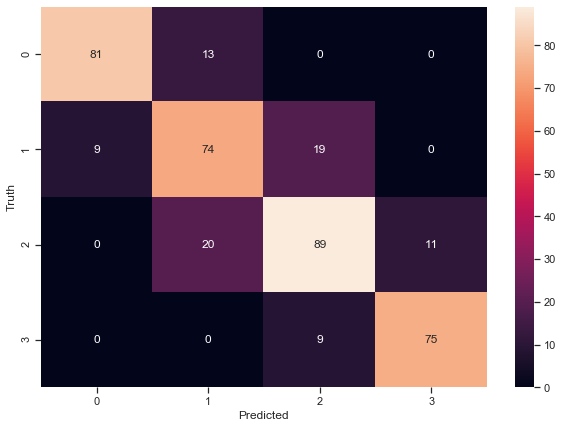

In [153]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [154]:
# Let's start with Decision Trees using gini impurity(CART):

decision_tree= DecisionTreeClassifier()

dt_model=decision_tree.fit(X_train, y_train)

predicted_decision_tree= decision_tree.predict(X_test)

dt_model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

# Decision Tree

In [155]:
# importing necessary libraries:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.tree import export_text
from sklearn.tree import plot_tree

In [156]:
# Let's start with Decision Trees using gini impurity(CART):

decision_tree= DecisionTreeClassifier()

dt_model=decision_tree.fit(X_train, y_train)

predicted_decision_tree= decision_tree.predict(X_test)

dt_model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [157]:
print("Test result of Decision Trees Model: ", decision_tree.score(X_test, y_test))

print("Train result of Decision Trees Model: ", decision_tree.score(X_train, y_train))

Test result of Decision Trees Model:  0.825
Train result of Decision Trees Model:  1.0


In [158]:
# Now predicting the accuracy and auc-roc of this model:

accuracy_decision_tree=metrics.accuracy_score(y_test, predicted_decision_tree)
print("Accuracy of Decision Tree Model: ", accuracy_decision_tree)

Accuracy of Decision Tree Model:  0.825


In [159]:
# representing graphically:

text_representation= tree.export_text(decision_tree)

print(text_representation)

|--- feature_13 <= 0.53
|   |--- feature_13 <= 0.23
|   |   |--- feature_11 <= 0.74
|   |   |   |--- feature_0 <= 0.89
|   |   |   |   |--- feature_13 <= 0.22
|   |   |   |   |   |--- feature_11 <= 0.55
|   |   |   |   |   |   |--- feature_13 <= 0.15
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_13 >  0.15
|   |   |   |   |   |   |   |--- feature_13 <= 0.16
|   |   |   |   |   |   |   |   |--- feature_12 <= 0.55
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- feature_12 >  0.55
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- feature_13 >  0.16
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_11 >  0.55
|   |   |   |   |   |   |--- feature_0 <= 0.73
|   |   |   |   |   |   |   |--- feature_16 <= 0.97
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- feature_16 >  0.97
|   |   |   |   |   |   |   |   |--- feature_5 <= 0.50
|

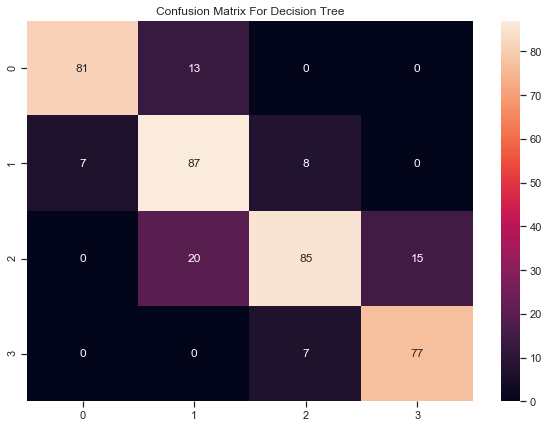

In [160]:
# Now drawing confusion matrix for above model

confusion_matrix_decision_tree= confusion_matrix(y_test, predicted_decision_tree)

# Representing graphically
plt.figure(figsize = (10,7))
plt.title('Confusion Matrix For Decision Tree')
sns.heatmap(confusion_matrix_decision_tree, annot= True)

In [161]:
print(metrics.classification_report(y_test, predicted_decision_tree))

              precision    recall  f1-score   support

           0       0.92      0.86      0.89        94
           1       0.72      0.85      0.78       102
           2       0.85      0.71      0.77       120
           3       0.84      0.92      0.88        84

    accuracy                           0.82       400
   macro avg       0.83      0.83      0.83       400
weighted avg       0.83      0.82      0.82       400



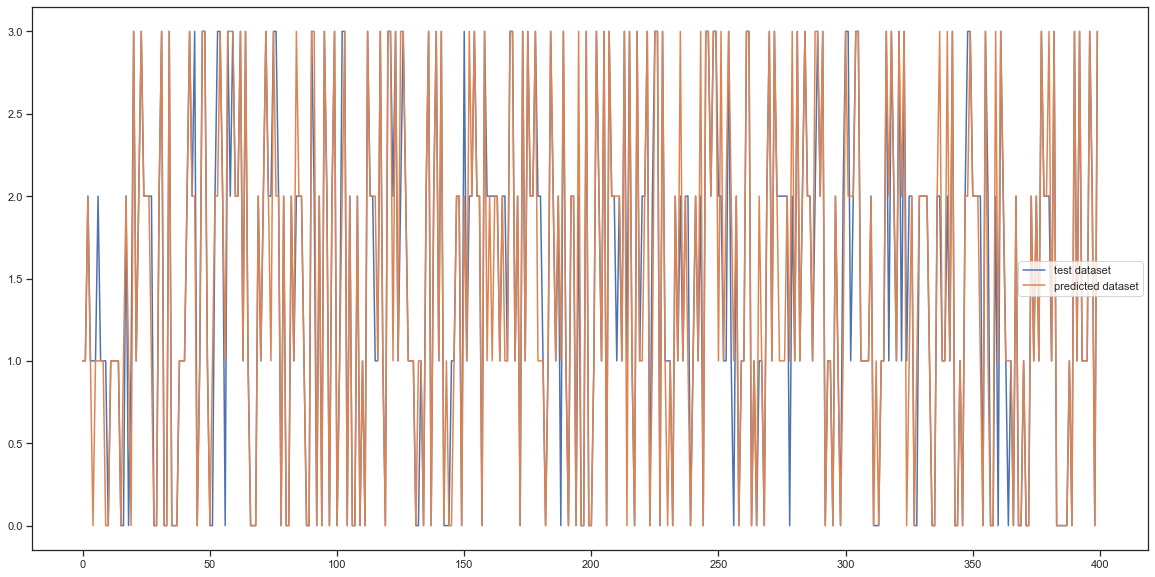

In [162]:
#diff_dt= y_test- predicted_decision_tree

plt.figure(figsize=(20,10))

plt.plot(np.arange(len(X_test)), y_test, label='test dataset')
plt.plot(np.arange(len(X_test)), predicted_decision_tree, label='predicted dataset')
plt.legend()

# Random Forest Classifier or Random Decision Forests

In [163]:
# Importing necessary libraries

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_roc_curve
import time

In [52]:
# Let's start with Random Forest Classifier

test_random_forest_classifier= list()
train_random_forest_classifier= list()

accuracy_random_forest_classifier= list()
auc_roc_random_forest_classifier= list()

accuracy_random_forest_classifier_probability= list()
auc_roc_random_forest_classifier_probability= list()

time_random_forest_classifier= list()

start= time.time()
current_time= start

for l in range(10, 1010, 10):
    random_forest_classifier= RandomForestClassifier(n_estimators=l, criterion='entropy')
    random_forest_classifier_probability= RandomForestClassifier( n_estimators=l)
    random_forest_classifier.fit(X_train, y_train)
    random_forest_classifier_probability.fit(X_train, y_train)
    
    prediction_random_forest_classifier= random_forest_classifier.predict(X_test)
    prediction_random_forest_classifier_probability= random_forest_classifier_probability.predict_proba(X_test)[:, 1]
    
    test_random_forest_classifier.append(random_forest_classifier.score(X_test, y_test))
    train_random_forest_classifier.append(random_forest_classifier.score(X_train, y_train))
    
    accuracy_random_forest_classifier.append(metrics.accuracy_score(y_test, prediction_random_forest_classifier))
    accuracy_random_forest_classifier_probability.append(metrics.accuracy_score(y_test, prediction_random_forest_classifier_probability>0.5))
    
    
    if l%50==0:
        current_time= time.time() - current_time
        if l%100 !=0:
            time_random_forest_classifier.append(current_time)
            print("Number of Random Forest Classifier Trees: ", l)
            print("Prediction completed by", l/10, "%")
            print("Took", current_time, " seconds")
            print("-------------------------")
print("Prediction completed by 100%")
finish= time.time() - start
    
print("Prediction took ", finish, " seconds")

Number of Random Forest Classifier Trees:  50
Prediction completed by 5.0 %
Took 3.0240185260772705  seconds
-------------------------
Number of Random Forest Classifier Trees:  150
Prediction completed by 15.0 %
Took 14.012639284133911  seconds
-------------------------
Number of Random Forest Classifier Trees:  250
Prediction completed by 25.0 %
Took 31.684035301208496  seconds
-------------------------
Number of Random Forest Classifier Trees:  350
Prediction completed by 35.0 %
Took 53.49874567985535  seconds
-------------------------
Number of Random Forest Classifier Trees:  450
Prediction completed by 45.0 %
Took 83.420969247818  seconds
-------------------------
Number of Random Forest Classifier Trees:  550
Prediction completed by 55.0 %
Took 118.63272190093994  seconds
-------------------------
Number of Random Forest Classifier Trees:  650
Prediction completed by 65.0 %
Took 160.62445068359375  seconds
-------------------------
Number of Random Forest Classifier Trees:  750


In [54]:
# Finding max train results:

print("In Random forest Classifier max train results: ", max(train_random_forest_classifier), " takes", (train_random_forest_classifier.index(max(train_random_forest_classifier))+1)*10, " trees")

In Random forest Classifier max train results:  1.0  takes 30  trees


In [55]:
# Finding max train results:

print("In Random forest Classifier max test results: ", max(test_random_forest_classifier), " takes", (test_random_forest_classifier.index(max(test_random_forest_classifier))+1)*10, " trees")

In Random forest Classifier max test results:  0.895  takes 690  trees


In [56]:
#Finding accuracy of Random Forest Classifier

accuracy_ran_for=max(accuracy_random_forest_classifier)
print("In Random Forest Classifier max accuracy results: ", max(accuracy_random_forest_classifier), " takes", (accuracy_random_forest_classifier.index(max(accuracy_random_forest_classifier))+1)*10, " trees")

print()

#Finding accuracy with probability of Random Forest Classifier

print("In Random Forest Classifier max accuracy with probability results: ", max(accuracy_random_forest_classifier_probability), " takes", (accuracy_random_forest_classifier_probability.index(max(accuracy_random_forest_classifier_probability))+1)*10, " trees")

In Random Forest Classifier max accuracy results:  0.895  takes 690  trees

In Random Forest Classifier max accuracy with probability results:  0.4  takes 610  trees


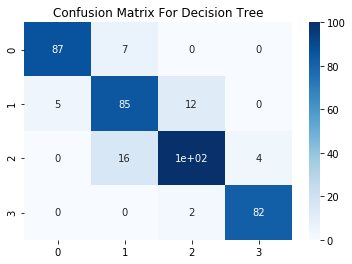

In [73]:
# Now drawing confusion matrix for above model
from sklearn.metrics import confusion_matrix
confusion_matrix_random_forest= confusion_matrix(y_test, prediction_random_forest_classifier)

# Representing graphically

plt.title('Confusion Matrix For Decision Tree')
sns.heatmap(confusion_matrix_random_forest, annot= True, cmap='Blues')

In [60]:
# Even though precision and recall are good measures for imbalanced data, we can touch on these concepts here:

print(metrics.classification_report(y_test, prediction_random_forest_classifier))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94        94
           1       0.79      0.83      0.81       102
           2       0.88      0.83      0.85       120
           3       0.95      0.98      0.96        84

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.89      0.89      0.89       400



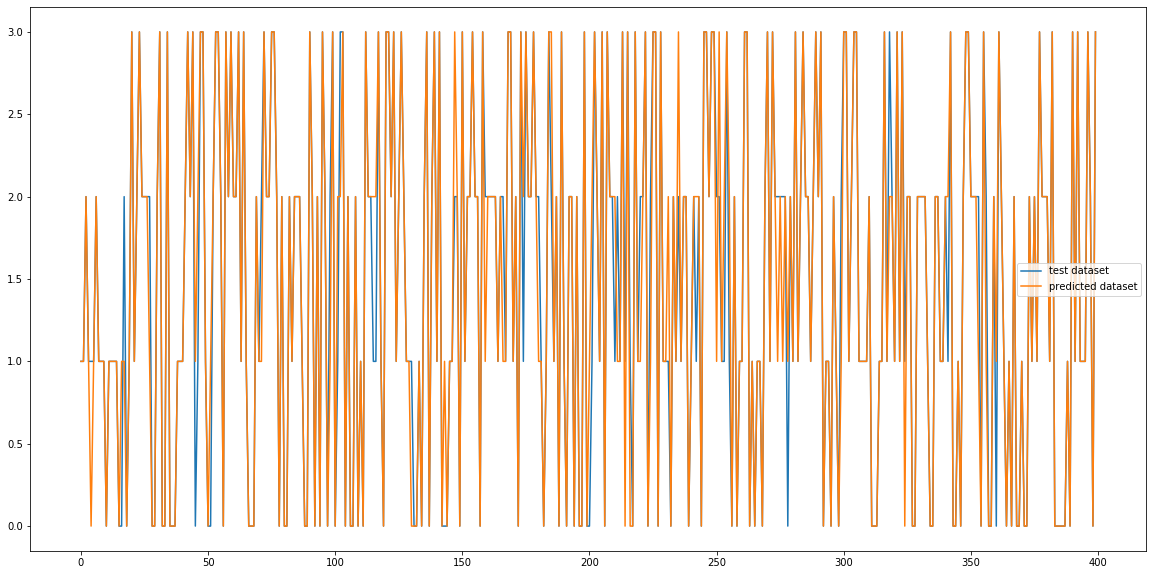

In [62]:
#diff_rf= y_test- prediction_random_forest_classifier

plt.figure(figsize=(20,10))

plt.plot(np.arange(len(X_test)), y_test, label='test dataset')
plt.plot(np.arange(len(X_test)), prediction_random_forest_classifier, label='predicted dataset')
plt.legend()

# Support Vector Machine Classifier Or SVM

In [164]:
# Importing necessary libraries

from sklearn import svm
from sklearn.svm import SVC
from sklearn import metrics

In [165]:
# Create a SVM Classifier

svm_kernel= svm.SVC()

In [166]:
# Training the model using the training sets

svm_kernel.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [167]:
# Predict the response for test dataset

y_predict_svm= svm_kernel.predict(X_test)

In [168]:
# SVM accuracy: how often is the classifier correct?

accuracy_svm_model= metrics.accuracy_score(y_test, y_predict_svm)
print("Accuracy of SVM model: ", accuracy_svm_model)

Accuracy of SVM model:  0.845


In [169]:
# Representing graphically

# plt.title('Support Vector Machine Classifier')
# plt.bar(np.add.reduce(x_test)+0.00, np.add.reduce(y_test))
# plt.bar(np.add.reduce(x_test)+0.80, np.add.reduce(y_predict_svm))
# plt.show()

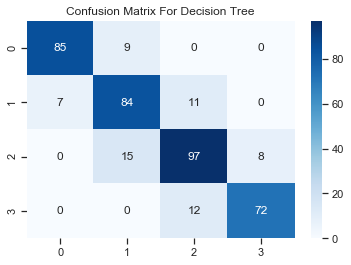

In [170]:
# Now drawing confusion matrix for above model
from sklearn.metrics import confusion_matrix
confusion_matrix_svm= confusion_matrix(y_test, y_predict_svm)

# Representing graphically

plt.title('Confusion Matrix For Decision Tree')
sns.heatmap(confusion_matrix_svm, annot= True, cmap='Blues')

In [171]:
# Even though precision and recall are good measures for imbalanced data, we can touch on these concepts here:

print(metrics.classification_report(y_test, y_predict_svm))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91        94
           1       0.78      0.82      0.80       102
           2       0.81      0.81      0.81       120
           3       0.90      0.86      0.88        84

    accuracy                           0.84       400
   macro avg       0.85      0.85      0.85       400
weighted avg       0.85      0.84      0.85       400



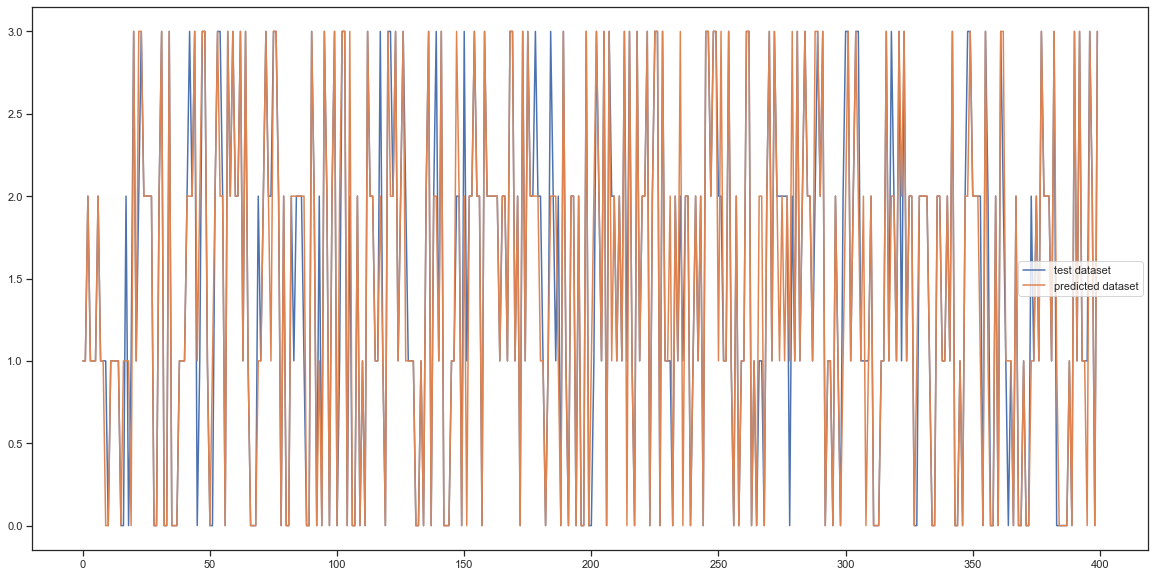

In [172]:
#diff_svm= y_test- y_predict_svm

plt.figure(figsize=(20,10))

plt.plot(np.arange(len(X_test)), y_test, label='test dataset')
plt.plot(np.arange(len(X_test)), y_predict_svm, label='predicted dataset')
plt.legend()

# Concluding The Best Model

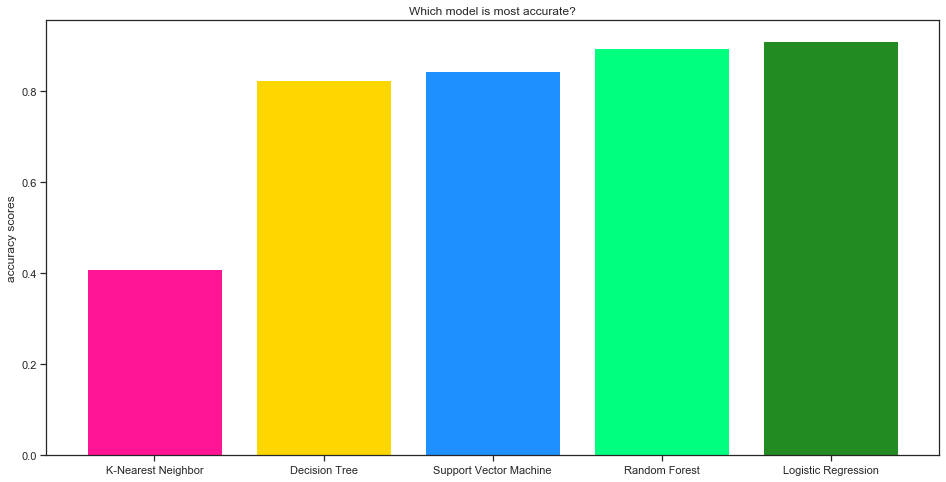

In [173]:
models= ['K-Nearest Neighbor', 'Decision Tree', 'Support Vector Machine', 'Random Forest', 'Logistic Regression']
acc_scores= [acc_knn, accuracy_decision_tree, accuracy_svm_model, accuracy_ran_for, acc_lr]

plt.figure(figsize=(16, 8))
plt.bar(models, acc_scores, color=['deeppink',  'gold', 'dodgerblue', 'springgreen', 'forestgreen'], )
plt.ylabel("accuracy scores")
plt.title("Which model is most accurate?")
plt.show()

# Applying Best Model On Test Dataset

In [174]:
#Now, we will load the testing dataset and preview it

test=pd.read_csv('datasets_test.csv')
test

id  battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0       1           1043     1          1.8         1  14       0           5   
1       2            841     1          0.5         1   4       1          61   
2       3           1807     1          2.8         0   1       0          27   
3       4           1546     0          0.5         1  18       1          25   
4       5           1434     0          1.4         0  11       1          49   
..    ...            ...   ...          ...       ...  ..     ...         ...   
995   996           1700     1          1.9         0   0       1          54   
996   997            609     0          1.8         1   0       0          13   
997   998           1185     0          1.4         0   1       1           8   
998   999           1533     1          0.5         1   0       0          50   
999  1000           1270     1          0.5         0   4       1          35   

     m_dep  mobile_wt  ...  pc  px_height  px_width   ram  sc_h  sc_w  \
0      0.1        193  ...  16        226      1412  3476    12     7   
1      0.8        191  ...  12        746       857  3895     6     0   
2      0.9        186  ...   4       1270      1366  2396    17    10   
3      0.5         96  ...  20        295      1752  3893    10     0   
4      0.5        108  ...  18        749       810  1773    15     8   
..     ...        ...  ...  ..        ...       ...   ...   ...   ...   
995    0.5        170  ...  17        644       913  2121    14     8   
996    0.9        186  ...   2       1152      1632  1933     8     1   
997    0.5         80  ...  12        477       825  1223     5     0   
998    0.4        171  ...  12         38       832  2509    15    11   
999    0.1        140  ...  19        457       608  2828     9     2   

     talk_time  three_g  touch_screen  wifi  
0            2        0             1     0  
1            7        1             0     0  
2           10        0             1     1  
3            7        1             1     0  
4            7        1             0     1  
..         ...      ...           ...   ...  
995         15        1             1     0  
996         19        0             1     1  
997         14        1             0     0  
998          6        0             1     0  
999          3        1             0     1  

[1000 rows x 21 columns]

In [175]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

In [176]:
test.shape

(1000, 21)

In [177]:
# We did not have 'id' column in the traning and validation datasets, so, we delete it from test dataset to make the dimension of input dataset same.

test1=test.drop('id',axis=1)

In [178]:
# Finding the total size of Test Dataset

print("Test Dataframe size:")
test1.shape

Test Dataframe size:


(1000, 20)

In [179]:
# Printing concise summary of our dataset or Data Analysis:
# Testing Dataset

test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  1000 non-null   int64  
 1   blue           1000 non-null   int64  
 2   clock_speed    1000 non-null   float64
 3   dual_sim       1000 non-null   int64  
 4   fc             1000 non-null   int64  
 5   four_g         1000 non-null   int64  
 6   int_memory     1000 non-null   int64  
 7   m_dep          1000 non-null   float64
 8   mobile_wt      1000 non-null   int64  
 9   n_cores        1000 non-null   int64  
 10  pc             1000 non-null   int64  
 11  px_height      1000 non-null   int64  
 12  px_width       1000 non-null   int64  
 13  ram            1000 non-null   int64  
 14  sc_h           1000 non-null   int64  
 15  sc_w           1000 non-null   int64  
 16  talk_time      1000 non-null   int64  
 17  three_g        1000 non-null   int64  
 18  touch_scr

In [180]:
# Generating the descriptive statistics of out dataset:
# Testing Dataset:

test1.describe()

battery_power         blue  clock_speed     dual_sim           fc  \
count    1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean     1248.510000     0.516000     1.540900     0.517000     4.593000   
std       432.458227     0.499994     0.829268     0.499961     4.463325   
min       500.000000     0.000000     0.500000     0.000000     0.000000   
25%       895.000000     0.000000     0.700000     0.000000     1.000000   
50%      1246.500000     1.000000     1.500000     1.000000     3.000000   
75%      1629.250000     1.000000     2.300000     1.000000     7.000000   
max      1999.000000     1.000000     3.000000     1.000000    19.000000   

            four_g   int_memory        m_dep   mobile_wt      n_cores  \
count  1000.000000  1000.000000  1000.000000  1000.00000  1000.000000   
mean      0.487000    33.652000     0.517500   139.51100     4.328000   
std       0.500081    18.128694     0.280861    34.85155     2.288155   
min       0.000000     2.000000     0.100000    80.00000     1.000000   
25%       0.000000    18.000000     0.300000   109.75000     2.000000   
50%       0.000000    34.500000     0.500000   139.00000     4.000000   
75%       1.000000    49.000000     0.800000   170.00000     6.000000   
max       1.000000    64.000000     1.000000   200.00000     8.000000   

                pc    px_height     px_width          ram         sc_h  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean     10.054000   627.121000  1239.774000  2138.998000    11.995000   
std       6.095099   432.929699   439.670981  1088.092278     4.320607   
min       0.000000     0.000000   501.000000   263.000000     5.000000   
25%       5.000000   263.750000   831.750000  1237.250000     8.000000   
50%      10.000000   564.500000  1250.000000  2153.500000    12.000000   
75%      16.000000   903.000000  1637.750000  3065.500000    16.000000   
max      20.000000  1907.000000  1998.000000  3989.000000    19.000000   

              sc_w    talk_time      three_g  touch_screen         wifi  
count  1000.000000  1000.000000  1000.000000    1000.00000  1000.000000  
mean      5.316000    11.085000     0.756000       0.50000     0.507000  
std       4.240062     5.497636     0.429708       0.50025     0.500201  
min       0.000000     2.000000     0.000000       0.00000     0.000000  
25%       2.000000     6.750000     1.000000       0.00000     0.000000  
50%       5.000000    11.000000     1.000000       0.50000     1.000000  
75%       8.000000    16.000000     1.000000       1.00000     1.000000  
max      18.000000    20.000000     1.000000       1.00000     1.000000

In [181]:
test1.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0           1043     1          1.8         1  14       0           5    0.1   
1            841     1          0.5         1   4       1          61    0.8   
2           1807     1          2.8         0   1       0          27    0.9   
3           1546     0          0.5         1  18       1          25    0.5   
4           1434     0          1.4         0  11       1          49    0.5   

   mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        193        3  16        226      1412  3476    12     7          2   
1        191        5  12        746       857  3895     6     0          7   
2        186        3   4       1270      1366  2396    17    10         10   
3         96        8  20        295      1752  3893    10     0          7   
4        108        6  18        749       810  1773    15     8          7   

   three_g  touch_screen  wifi  
0        0             1     0  
1        1             0     0  
2        0             1     1  
3        1             1     0  
4        1             0     1

In [182]:
print("Test Dataframe size:")
test1.shape

Test Dataframe size:


(1000, 20)

In [183]:
# Also, we need to normalise and scale the data, so we'll use Scaler:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()

# We normalize test sample

scaler.fit(test1)
test1=scaler.transform(test1)

# Checking it:

print("test1: ")
print(test1)

test1: 
[[0.36224149 1.         0.52       ... 0.         1.         0.        ]
 [0.22748499 1.         0.         ... 1.         0.         0.        ]
 [0.87191461 1.         0.92       ... 0.         1.         1.        ]
 ...
 [0.45697131 0.         0.36       ... 1.         0.         0.        ]
 [0.68912608 1.         0.         ... 0.         1.         0.        ]
 [0.51367578 1.         0.         ... 1.         0.         1.        ]]


In [184]:
# Predicting price range for test dataset:

predicted_price_range= lr.predict(test1)

# We are able to forecast test dataset labels:

predicted_price_range


array([3, 3, 2, 3, 1, 3, 3, 1, 3, 0, 3, 3, 0, 0, 2, 0, 2, 1, 3, 2, 1, 3,
       1, 1, 3, 0, 2, 0, 3, 0, 2, 0, 3, 0, 1, 1, 3, 1, 2, 1, 1, 2, 0, 0,
       0, 1, 0, 3, 1, 2, 1, 0, 3, 0, 3, 0, 3, 1, 0, 3, 3, 3, 0, 1, 1, 1,
       2, 3, 1, 2, 1, 2, 2, 3, 3, 0, 2, 0, 1, 3, 0, 3, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 1, 2, 1, 2, 1, 0, 2, 1, 3, 1, 0, 0, 3, 0, 2, 1, 1, 2, 3,
       3, 3, 1, 3, 3, 3, 3, 2, 3, 0, 0, 3, 2, 1, 2, 0, 3, 2, 2, 1, 0, 2,
       2, 1, 3, 1, 1, 0, 3, 2, 1, 2, 1, 3, 2, 3, 3, 3, 2, 3, 2, 3, 1, 0,
       3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 1, 0, 3, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 2, 1, 0, 0, 1, 1, 2, 1, 1, 0, 0, 0, 1, 0, 3, 1, 0, 2, 2,
       3, 3, 1, 2, 3, 3, 3, 2, 2, 1, 0, 0, 1, 3, 0, 2, 3, 3, 0, 2, 0, 3,
       2, 3, 3, 1, 0, 1, 0, 3, 0, 1, 0, 2, 2, 1, 3, 1, 3, 0, 3, 1, 2, 0,
       0, 2, 1, 3, 3, 3, 1, 1, 3, 0, 0, 2, 3, 3, 1, 3, 1, 1, 3, 2, 1, 2,
       3, 3, 3, 1, 0, 0, 2, 3, 1, 1, 3, 2, 0, 3, 0, 0, 3, 0, 0, 3, 2, 3,
       3, 2, 0, 3, 3, 2, 3, 2, 2, 1, 2, 0, 2, 3, 1,

In [185]:
# Updating the price range in test dataset

test['price_range'] = predicted_price_range


In [186]:
# Seeing test dataset after update

test.head()

id  battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0   1           1043     1          1.8         1  14       0           5   
1   2            841     1          0.5         1   4       1          61   
2   3           1807     1          2.8         0   1       0          27   
3   4           1546     0          0.5         1  18       1          25   
4   5           1434     0          1.4         0  11       1          49   

   m_dep  mobile_wt  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0    0.1        193  ...        226      1412  3476    12     7          2   
1    0.8        191  ...        746       857  3895     6     0          7   
2    0.9        186  ...       1270      1366  2396    17    10         10   
3    0.5         96  ...        295      1752  3893    10     0          7   
4    0.5        108  ...        749       810  1773    15     8          7   

   three_g  touch_screen  wifi  price_range  
0        0             1     0            3  
1        1             0     0            3  
2        0             1     1            2  
3        1             1     0            3  
4        1             0     1            1  

[5 rows x 22 columns]

In [96]:
# Hence, multi-class module completed.

In [187]:
#--------FINISH-----------

-------End---------